## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Spotify dataset

In [2]:
df = pd.read_csv("data/spotify.csv")

----------

## 1. Are there any missing values in the dataset?

In [3]:
# Your code goes here 💪
df.isnull().sum()

Unnamed: 0          0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

## 2. How many songs are there in the dataset?

In [4]:
# Your code goes here 💪
df.shape

(169909, 20)

In [5]:
# Your code goes here 💪


## 3. What's the average duration of a song, in minutes?

In [6]:
# Your code goes here 💪
df.duration_ms.mean()/1000/60

3.856769316222213

## 4. Can you plot the distribution of the durations?

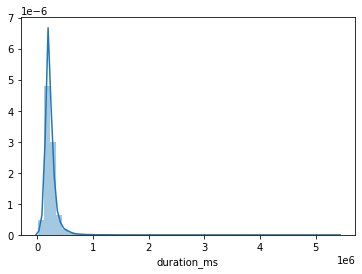

In [7]:
# Your code goes here 💪
sns.distplot(df.duration_ms)

## 5. [Follow-up] Can you make this plot more readable by removing outliers (extreme values)?

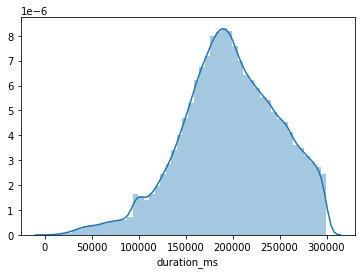

In [8]:
df_2 = df[df.duration_ms < 300000]
sns.distplot(df_2.duration_ms)

We only remove 470 songs (out of almost 170k) and get a way more interesting plot!

## 6. How long would it take to listen to all the songs?

In [9]:
# Your code goes here 💪
df.duration_ms.sum()/1000/60/60/24

455.0693178819444

This length is expressed in milliseconds, let's convert to days!

## 7. What are the top 10 most popular songs? We would like a DataFrame with only the columns `artists`, `name` and `popularity` as output!

In [10]:
# Your code goes here 💪
df.nlargest(10,"popularity")[["artists","name","popularity"]]

,artists,name,popularity
87942,['The Weeknd'],Blinding Lights,100
87940,"['DaBaby', 'Roddy Ricch']",ROCKSTAR (feat. Roddy Ricch),99
87949,"['Powfu', 'beabadoobee']",death bed (coffee for your head) (feat. beabad...,97
87941,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",THE SCOTTS,96
87840,['Roddy Ricch'],The Box,95
87844,"['BENEE', 'Gus Dapperton']",Supalonely,95
87852,"['Surf Mesa', 'Emilee']",ily (i love you baby) (feat. Emilee),95
87946,['Drake'],Toosie Slide,95
87858,['Tones And I'],Dance Monkey,94
87943,['StaySolidRocky'],Party Girl,94


## 8. Can you plot the distribution of `popularity`?

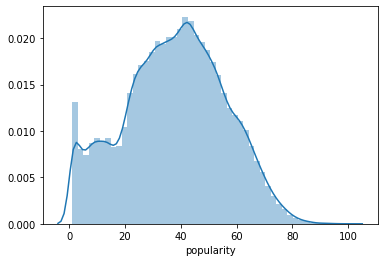

In [11]:
# Your code goes here 💪
#sns.distplot(df.popularity)

# Start above 0
df_0 = df[df.popularity>0]
sns.distplot(df_0.popularity)

## 9. What are the top 10 artists in terms of number of songs?

In [12]:
# Your code goes here 💪
bar_chart = df.artists.value_counts().head(10)
bar_chart

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
['Johnny Cash']            502
['The Beach Boys']         491
['Elvis Presley']          488
Name: artists, dtype: int64

## 10. [Follow-up] can you make a bar chart out of this result?

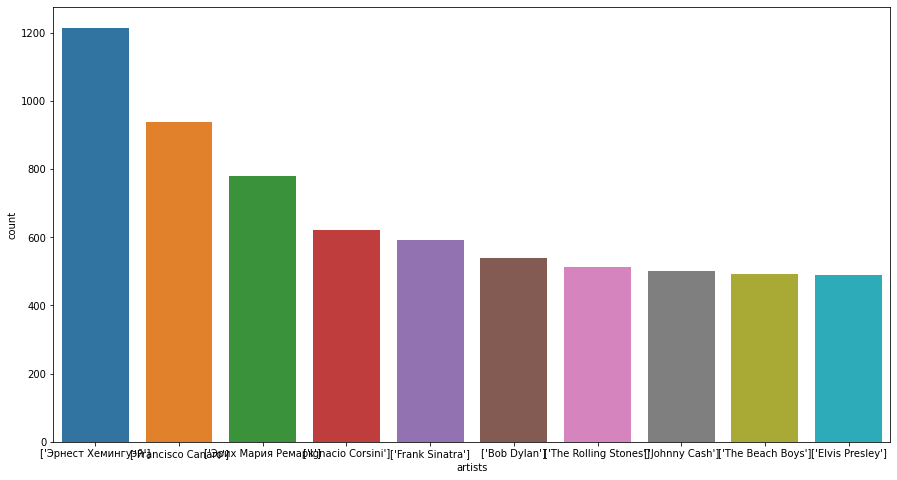

In [13]:
# Your code goes here 💪
plt.figure(figsize=(15, 8))

order = df.artists.value_counts().head(10).index
sns.countplot(data=df,x="artists",order = order)

## 11. Can you plot a line graph representing the annual number of songs since 1921?

In [14]:
# Your code goes here 💪
songs_per_year = df.year.value_counts().sort_index().cumsum()
songs_per_year

1921       128
1922       200
1923       369
1924       606
1925       869
         ...  
2016    162153
2017    164153
2018    166153
2019    168153
2020    169909
Name: year, Length: 100, dtype: int64

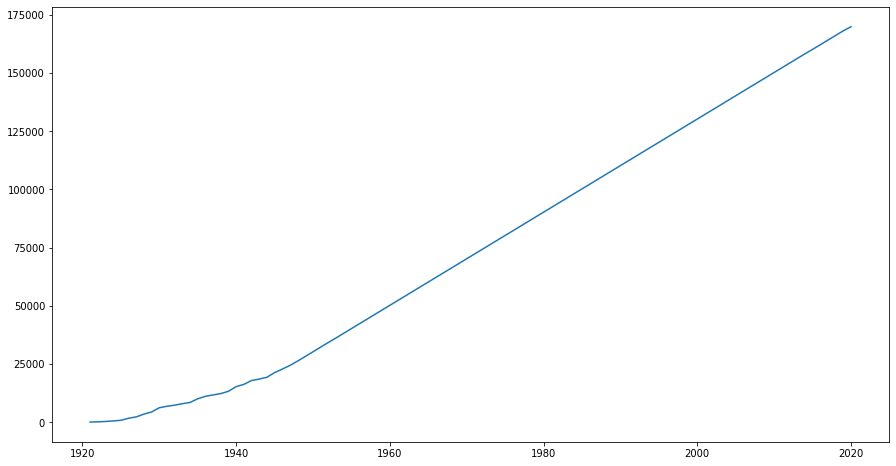

In [30]:
plt.figure(figsize=(15, 8))
songs_per_year.plot(kind="line")


Last question! 👇

## 12. Can you visually check if there is relationship between `year` and `popularity`?

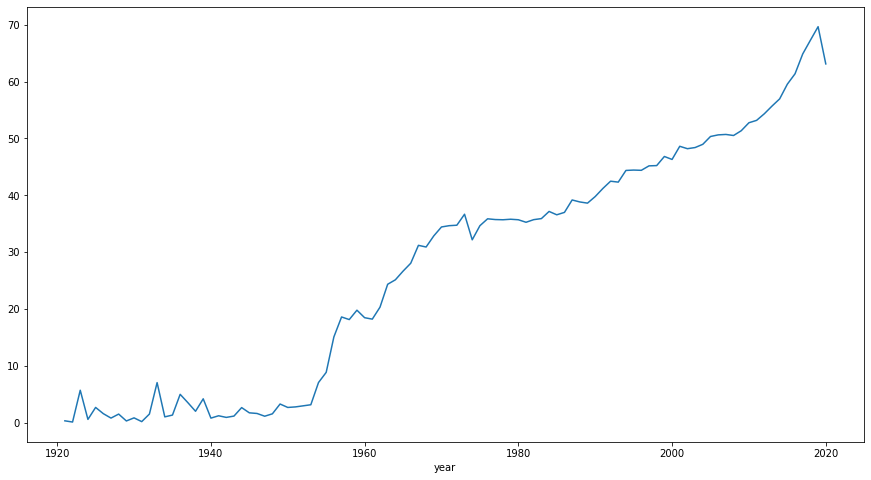

In [31]:
plt.figure(figsize=(15, 8))
grouped_df = df.groupby("year")
mean_df = grouped_df.popularity.mean()
mean_df.plot(kind="line")
#https://www.kite.com/python/answers/how-to-group-a-pandas-dataframe-by-a-column-and-compute-the-mean-of-each-group-in-python

It seems that the popularity score has increased through time....

## 12. Can you show a dataframe showing the mean of danceability, instrumentalness and loudness for every year ? 

In [27]:
df_2 = df[["danceability","instrumentalness","energy","year"]].groupby('year').mean().sort_values(by='year')

df_2

,danceability,instrumentalness,energy
year,,,
1921,0.425661,0.322330,0.236784
1922,0.480000,0.440470,0.237026
1923,0.568462,0.401932,0.246936
1924,0.548654,0.583955,0.347033
1925,0.571890,0.408893,0.264373
...,...,...,...
2016,0.599976,0.074646,0.592877
2017,0.612286,0.098209,0.586739
2018,0.664930,0.035948,0.590591


## 13. [Follow-up] Can you plot this dataframe in one graph showing trends for each category as lines ? 

<Figure size 1080x576 with 0 Axes>

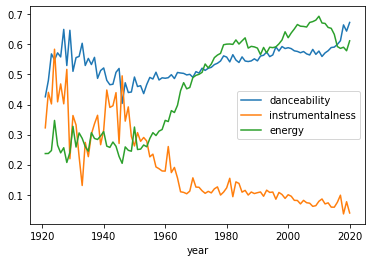

In [32]:
plt.figure(figsize=(15, 8))
df_2.plot(kind="line")